# ***Predicting the Survival of Passengers Using The Titanic Dataset***


**Objectives**

This week's project requires us to implement a K-nearest neighbor classifier on the Titanic dataset to predict the survival of passengers using the Titanic Dataset.

***Metric of Success***

Our KNN model would be considered a success if it is able to compute an accuracy score of at least 80% or greater.


***Experimental Design***

Project followed the phases of CRISP-DM. It included the following phases:

1. Problem Understanding

2. Data Understanding

3. Data Preparation

4. Modelling

5. Evaluation

## ***Data Exploration***

***Importing the libraries.***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn import metrics

In [48]:
#Ill then view the dataset
df_train = pd.read_csv('/content/train (5).csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
#Ill then check the tail of the dataset
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
#Ill check the columns
df_train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [50]:
#Ill then change the column names to lower case
df_train.columns = df_train.columns.str.lower()
#CHANGED!!


In [8]:
#Ill check the general info of the dataset
 df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#Ill then check the shape of the dataset
df_train.shape
# 891 rows and 12 columns

(891, 12)

## ***Data Cleaning***

In [51]:
#Ill first check for nulls
df_train.isnull().sum()


passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

Age and Cabin both have high null values

In [52]:
#Ill then drop the column names that i dont require
new_df = df_train.drop(['ticket', 'cabin', 'passengerid'], axis=1)
new_df.head()
#They are dropped

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [53]:
#Ill also drop the name column since it has no effect to survival of passegers.
new_df = new_df.drop(['name'],axis=1)
new_df


,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [54]:
#Ill then handle the missing values in the Age column by putting 
# the so we just put the mean age for each sex.¶
import math
female_mean, male_mean = new_df.groupby("sex")["age"].mean()
def fill_age(age,sex):
    if math.isnan(age):
        if sex == "male":
            return male_mean
        else:
            return female_mean
    else:
        return age

In [55]:
#Ill then apply the function to the age column
new_df["age"] = new_df.apply(lambda row : fill_age(row["age"],row["sex"]),axis = 1)

In [56]:
#Ill then confirm if it has been changed
new_df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
dtype: int64

embarked has two missing values,ill drop the NAN

In [57]:
#Ill then drop the remaining null values.
new_df = new_df.dropna()

In [58]:
##Ill then confirm if it has been changed
new_df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

*Done*

## ***Exploratory Data Analysis***

In [47]:
new_df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,NaN,22.0,1,0,7.2500,0
1,1,1,NaN,38.0,1,0,71.2833,1
2,1,3,NaN,26.0,0,0,7.9250,0
3,1,1,NaN,35.0,1,0,53.1000,0
4,0,3,NaN,35.0,0,0,8.0500,0


In [32]:
#Their was an extra age column in the dataset
new_df.pop('Age')

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    27.915709
889    26.000000
890    32.000000
Name: Age, Length: 889, dtype: float64

In [34]:
#Ill first describe the data
new_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.690446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.981441,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


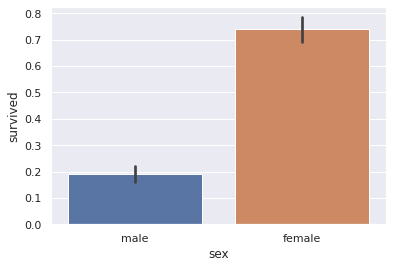

In [35]:
#Ill then plot a bar plot show which gender survives the most
sns.barplot(x = new_df["sex"], y = new_df["survived"])


***The output shows that women tend to survive more than male***

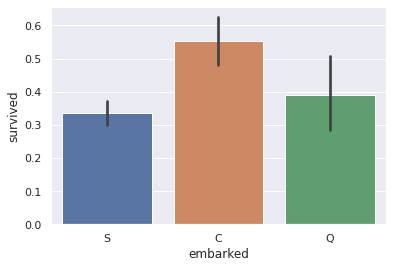

In [36]:
#Ill then plot a bar plot to show which embarkation had the highest survival rate
sns.barplot(x = new_df["embarked"], y = new_df["survived"])


***Embarkation C had the highest survival rate***

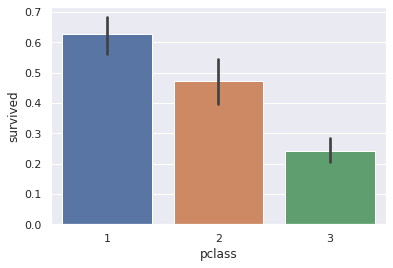

In [37]:
#Ill also plot a bar plot to which p class had the highest survival rate
sns.barplot(x = new_df['pclass'],y = new_df['survived'])

***First class had the highest survival rate.***

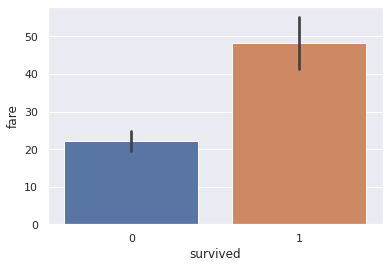

In [38]:
#Ill then check if fare had any influence of the survival rate.\
sns.barplot(x = new_df['survived'], y = new_df['fare'])

***0 = No, 1 = Yes they survived***

***This shows that their is a relationship, as the price of the fair go higher so as the survival rate.***

In [59]:
#Ill then check for Multicollinearity in the dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# creating dummies for gender
new_df['sex'] = new_df['sex'].map({'male':0, 'female':1})
  
# the independent variables set
X = new_df[['survived', 'pclass','age','sibsp',	'parch','fare', ]]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

    feature       VIF
0  survived  1.614307
1    pclass  3.812186
2       age  4.003935
3     sibsp  1.566868
4     parch  1.558064
5      fare  1.828573


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


***Their is no need for dropping any columns since the VIF score is not 5. The columns are okay***

## ***K Nearest Neighbour***

***Pre-Processing***

In [63]:
new_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,27.915709,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


In [62]:
#Ill first map categorical variables to numerical
new_df['embarked'] = new_df.embarked.map({'S': 0, 'C': 1, 'Q': 2}).astype(int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


***Male = 0***

***Female = 1***

***90-10 split***

In [65]:
#Ill first split the dataset using 90-10 SPLIT
features = new_df.drop('survived', 1).values
target = new_df['survived'].values

In [66]:
# Ill then split our data into training and test sets at a ratio of 90:10%
X_train, x_test, Y_train, y_test = train_test_split(features, target, test_size=.1, random_state=34)

In [67]:
# Ill then scale the features to reduce bias
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

x_test = scaler.transform(x_test)

In [68]:

# instantiating the KNeighbors Classifier with 5 neighbors
kclassif = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1)

# fitting the model with training data
kclassif.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [71]:
#Ill then make predictions
kpred = kclassif.predict(x_test)


In [73]:
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, kpred))
print('Classification Report:\n', metrics.classification_report(y_test, kpred))

print('Accuracy: %.2f%%'% (metrics.accuracy_score(y_test, kpred) * 100))

Confusion Matrix:
 [[49  7]
 [ 8 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87        56
           1       0.78      0.76      0.77        33

    accuracy                           0.83        89
   macro avg       0.82      0.82      0.82        89
weighted avg       0.83      0.83      0.83        89

Accuracy: 83.15%


***Hyper Paremeter Tuning***

In [76]:

kfold = KFold(n_splits=10, random_state=5)

# creating a dictionary of parameters to be searched for optimal performance of model
params = {'n_neighbors': range(1,5),\
         'metric': ['euclidean', 'manhattan', 'minkowski'],
         'weights': ['uniform', 'distance']}

# instantiating the gridsearchcv object 
grids = GridSearchCV(estimator=KNeighborsClassifier(), 
                     param_grid=params, 
                     cv=kfold, n_jobs=-1)

# fitting the gridsearch with training data
gridmodel = grids.fit(X_train, Y_train)

# getting the best parameters from the model
gridmodel.best_params_
# getting the best score from the model
gridmodel.best_score_ * 100

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


81.0

In [79]:
# instantiating knn classifier with parameters from the grid search
knclassifop = KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='uniform')

# fitting the model with training data
knclassifop.fit(X_train, Y_train)

# making predictions 
knop_pred = knclassifop.predict(x_test)

# print the confusion matrix 
print('\nConfusion Matrix:\n', metrics.confusion_matrix(y_test, knop_pred))
print('===='*20)
# checking the accuracy score of the optimized model
print('\nAccuracy Score: %.2f%%' % (metrics.accuracy_score(y_test, knop_pred) * 100))
print('===='*20)
# print classification report
print('Classification report:\n', metrics)


Confusion Matrix:
 [[51  5]
 [ 9 24]]

Accuracy Score: 84.27%
Classification report:
 <module 'sklearn.metrics' from '/usr/local/lib/python3.7/dist-packages/sklearn/metrics/__init__.py'>


***After performig hyper paremeter tuning, the model increased its accuracy by 1%***

***80-20 split***

In [80]:
X_train, x_test, Y_train, y_test = train_test_split(features, target, test_size=.2, random_state=34)

In [81]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

x_test = scaler.transform(x_test)
# instantiating the KNeighbors Classifier with 5 neighbors
kclassif = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1)

# fitting the model with training data
kclassif.fit(X_train, Y_train)
#Ill then make predictions
kpred = kclassif.predict(x_test)
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, kpred))
print('Classification Report:\n', metrics.classification_report(y_test, kpred))

print('Accuracy: %.2f%%'% (metrics.accuracy_score(y_test, kpred) * 100))


Confusion Matrix:
 [[100  14]
 [ 18  46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       114
           1       0.77      0.72      0.74        64

    accuracy                           0.82       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.82      0.82      0.82       178

Accuracy: 82.02%


***70-30 split***

In [82]:
X_train, x_test, Y_train, y_test = train_test_split(features, target, test_size=.3, random_state=34)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

x_test = scaler.transform(x_test)
# instantiating the KNeighbors Classifier with 5 neighbors
kclassif = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1)

# fitting the model with training data
kclassif.fit(X_train, Y_train)
#Ill then make predictions
kpred = kclassif.predict(x_test)
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, kpred))
print('Classification Report:\n', metrics.classification_report(y_test, kpred))

print('Accuracy: %.2f%%'% (metrics.accuracy_score(y_test, kpred) * 100))


Confusion Matrix:
 [[143  25]
 [ 25  74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       168
           1       0.75      0.75      0.75        99

    accuracy                           0.81       267
   macro avg       0.80      0.80      0.80       267
weighted avg       0.81      0.81      0.81       267

Accuracy: 81.27%


***60-40 split***

In [83]:
X_train, x_test, Y_train, y_test = train_test_split(features, target, test_size=.4, random_state=34)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

x_test = scaler.transform(x_test)
# instantiating the KNeighbors Classifier with 5 neighbors
kclassif = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1)

# fitting the model with training data
kclassif.fit(X_train, Y_train)
#Ill then make predictions
kpred = kclassif.predict(x_test)
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, kpred))
print('Classification Report:\n', metrics.classification_report(y_test, kpred))

print('Accuracy: %.2f%%'% (metrics.accuracy_score(y_test, kpred) * 100))

Confusion Matrix:
 [[190  34]
 [ 34  98]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       224
           1       0.74      0.74      0.74       132

    accuracy                           0.81       356
   macro avg       0.80      0.80      0.80       356
weighted avg       0.81      0.81      0.81       356

Accuracy: 80.90%


### ***Conclusion***

From the above Modelling, the most accurate model was the 90-10 split which yielded a 83.3% accuracy. I used a 5 as my K since There is no ideal value for K and it is selected after testing and evaluation, 
however to start out, 5 seems to be the most commonly used value for KNN algorithm.